KISS Principle - "Keep it Simple, Stupid"

ABCs, like descriptors, and metaclasses, are tools for building frameworks. So they are only really needed by a handful of developers.

## Interfaces and Protocols in Python Culture

Protocols - The informal interfaces that allows for polymorphism to work in language with dynamic typing, like Python.

Every class has an interface; The set of public attributes - methods AND data - that are implemented or inherited by the class. This includes special dunder methods. Private and protected attributes are not part of an interface.

Another definition of an inteface is: the subset of an object's public methods that enable its role in the given system.

So long as an object fulfills certain methods, it can obey some particular interface. e.g. a "file-like object" might just need to have a `.read()` method.

When an interface is seen as a set of methods that fulfill some role, it can be called a protocol. Protocols are independent of inheritance, and a class may implement several protocols, fulfilling several roles.

"X-like object", "X protocol", and "X interface" are synonomous for Pythonistas

## Python Digs Sequences

Python goes out of its way to support fundamental protocols, such as sequences.

All a sequence like class needs is \__getitem__ and \__len__. Python is able to use the implemented \__getitem__ method to allow for iteration over the class(even without \__iter__), and containment checking(even without a \__contains__ method.

So in Python, you can create a sequence like class without having to inherit from abc.Sequence, so long as you implement \__getitem__ and \__len__ - which is following the sequence protocol.

Page 324

## Monkey-Patching to Implement a Protocol at Runtime

When you follow established protocolsl, you have a better chance of being able to leverage existing libraries, standard and third party. For example, if you're class is sequence-like, it can be used by Python's random.shuffle().

The basic sequence interface requirement of including \__getitem__ and \__len__ methods is for immutable sequences. Mutable sequences also require \__setitem__. So running random.shuffle() on an immutable sequence like class because shuffle requires item assignment through the \__setitem__ method.

__Monkey Patching__: changing a class or module at runtime, without touching the source code

Example:

assume there exists a class called FrenchDeck

```def set_card(deck, position, card):
    deck._cards[position] = card```

assigned above function to \__setitem__
This exemplifies that all Python methods start life as a plain function.
the class conventions of calling the first arg self aren't followed here because, for now, we're just writing a function
in sourcecode they should be followed.

`FrenchDeck.__setitem__ = set_card`

shuffle an instance of FrenchDeck, which is now possible given the new __setitem__ attribute.

`shuffle(deck)`

This also shows how dynamic protocols are. `shuffle` doesn't care what type the argument it recieves is. It just cares that it implements the required part of the mutable sequence call, regardless of it was monkey typed or not.

Duck typing - operating with objects regardless of their types, as long as they implenent the required method

## Alex Martelli's Waterfowl

__goose typing__: isinstance(obj, cls) is fine, so long as cls is an absctract base class. That cls's metaclass is abc.ABCMeta

Essentially, if you're implenting a class embodying any concepts represented in Python's ABCs, be it in numbers or collections etc, be sure to subclass or register it into the corresponding ABC.

So when you're type checking you would do something like `isistance(arg, collections.abc.Sequence` for if it is of type sequence.

This is good for two reasons:
* It means you have to implement the required methods.
* It is a clear signal of intent on the developer's behalf

__meta class__: Essentially, the class of a class.

Very very very few programmers need to go so deep into metaprogramming so as to write their own ABCs in Python.

__Be weary of the "all problems look like a nail" syndrome, for someone who just got a shiny new hammer.__

In Python, and other duck typed languages, its generally bad practise to use excessive `isistance` checks. Having a chain of if statements running different processes depending on the type of the given object is bad. Instead, use polymorphism - designing classes so that the interpretter dispatches calls to the proper methods, instead of hardcoded dispatch logic.

For example, if you need to take a sequence of items and process them as a list, it is better to just call `list(seq)`, which will work if `seq` is an iterable or error otherwise, instead of first checking the type. Although, this may not work if you are trying to avoid copying the sequence, which is what `list(seq)` does. Either because it's too large, or processing needs to be done in place.

## Subclassing an ABC

If you create a subclass of an ABC, Python will error at runtime if not all of the required methods are implemented.

ABC subclasses will always inherit several concrete methods, that are implemented for that class' interface.
This means they work without any knowledge on the internal structure and workings of instances. 
So feel free to override them when it suits the situation.

## ABCs in the Standard Library

### collections.abc

To reduce loading time this is implemented outside of the collections package, and thus must be imported separately. 

ABCs in collections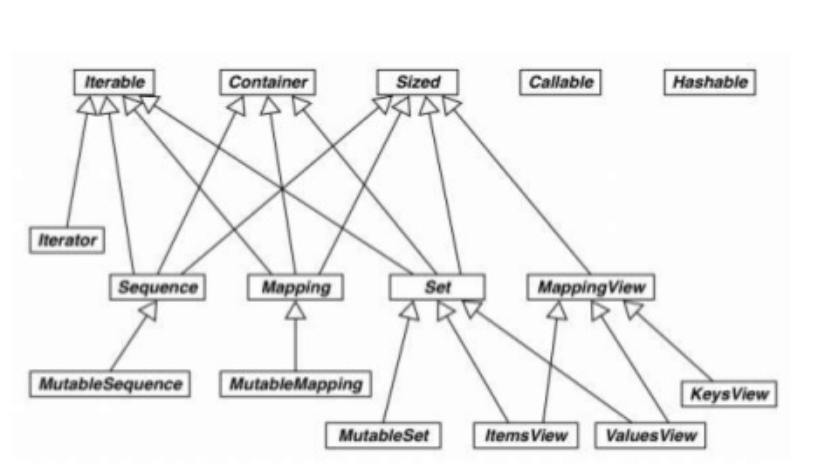

#### Iterable, Container, and Sized

Every collection should inherit from these, or implement similar protocols. Iterable supports iteration with \__iter__, Container supports the in operator with \__contains__, and Sized supports len() with \__len__.

#### Sequence, Mapping, and Set

The main immutable collection types. Each has a mutable subclass called `Mutable<name>`. 

#### MappingView

In Python 3, `.items()`, `.keys()`, and `.values()` inherit from ItemsView, KeysView, and ValuesView - which all inherit from MappingView. ItemsView and KeysView also inherit from Set.

#### Callable and Hashable

Not exactly collections, but ended up being defined in this module. Mainly used for supporting isinstance built in as a way of determing if an object is callable or hashable or not.

E.g. callable(obj) does isinstance(obj, Callable)
For checking if an object is hashable, do `isinstance(obj, Hashable)`

#### Iterator

Subclasses iterable.

### numbers

numbers package defines a numerical tower as its hierarchy of ABCs:
* Number
* Complex
* Real
* Rational
* Integral

So checking for an integer, can be done using isinstance(x, numbers.Integral) to accept integer types(including bool, which subclasses int). If you want to check for floating points, do isinstance(x, numbers.Real)

## Defining and Using an ABC